### Introduction and Motivation

The planet's average surface temperature has risen about 2.05 degrees Fahrenheit (1.14 degrees Celsius) since the late 19th century, a change driven largely by increased carbon dioxide and other human-made emissions into the atmosphere.4 Most of the warming occurred in the past 40 years, with the six warmest years on record taking place since 2014. Not only was 2016 the warmest year on record, but eight months out of that year — from January through September, except for June — were the warmest on record for those respective months. 

This serves as a motivation to select this project. It is important to study the quantifiable weather parameters such as humidity, dewpoint, pressure to derive a relationship that helps determine the surface temperature. If this relationship can be defined by a model, it can be used to predict future temperatures over many years and thus can help prepare for climate change impacts and mitigate the crisis.

In [1]:
#Importing necessary packages at once. Sklearn Packages for Linear Regression Modeling and Prediction. 
#Matplotlib and PlotlyExpress for Vizualizations

In [2]:
import numpy as np 
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#Reading the CSV file as GCD. Write more on dataset here.. 

In [4]:
GCD=pd.read_csv('climate_data_Until_July.csv')
GCD.tail(5)

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160
3901,2020-07-28,60.5,61.0,45.3,29.7,4.0,6.2,248.0,0.35,4.49,...,94.0,35.0,29.792,29.675,17.3,26.5,77.6,2020-07-28,7,0.117


In [5]:
#Storing the data in DataFrame
df_GCD = pd.DataFrame(GCD)

### Data Preprocessing and Clean-up

In [6]:
#Processing data by removing redundant columns such as date, difference in pressure 
# Date has been tranformed to include day and month as values separately.
# Difference in Pressure was computed based on existing columns Max. Pressure and Min. Pressure

Intermediate_Set= df_GCD.iloc[:,0:20]
Intermediate_Set["Day"] = pd.DatetimeIndex(Intermediate_Set['Date']).day
Intermediate_Set["Month"] = pd.DatetimeIndex(Intermediate_Set['Date']).month
Intermediate_Set["Month"] = pd.to_numeric(Intermediate_Set["Month"])
Intermediate_Set["Day"] = pd.to_numeric(Intermediate_Set["Day"])
Intermediate_Set.head(5)

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Day,Month
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,34.0,4.0,27.0,29.762,29.596,41.4,59.0,40.0,1,1
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,37.0,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2,1
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,6.0,8.0,35.0,30.232,29.260,25.3,38.0,41.0,3,1
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,-0.0,7.0,35.0,30.566,30.227,12.7,20.0,32.0,4,1
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,15.0,5.0,13.0,30.233,29.568,38.0,53.0,32.0,5,1


In [7]:
input_all_columns_GCD = Intermediate_Set.iloc[:,1:22]
input_all_columns_GCD.head(5)

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Day,Month
0,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,0.0,...,34.0,4.0,27.0,29.762,29.596,41.4,59.0,40.0,1,1
1,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,0.0,...,37.0,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2,1
2,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,0.0,...,6.0,8.0,35.0,30.232,29.260,25.3,38.0,41.0,3,1
3,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,0.0,...,-0.0,7.0,35.0,30.566,30.227,12.7,20.0,32.0,4,1
4,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,0.0,...,15.0,5.0,13.0,30.233,29.568,38.0,53.0,32.0,5,1


In [8]:
#Checking all columns and data for Null Values
df_GCD.isnull().values.any()

False

### Modelling - Dividing Data into'training' and 'testing' 

In [9]:
#Spilting the dataset for training and testing using function train_test_spilt from sklearn library. 
#we include our data frame and a test size which splits the data as 30% for our test set and 70% for our training set. 

training_GCD, testing_GCD = train_test_split(input_all_columns_GCD, test_size=0.30, random_state=42)
print(training_GCD.shape)
print(testing_GCD.shape)

(2731, 21)
(1171, 21)


In [10]:
#We would be predicting Average temperature using relevant parameter, 
#hence dropping this label and storing it separately for modeling.
training_GCDdata = training_GCD.drop(["Average temperature (°F)"], axis=1)
print(training_GCDdata.shape)

training_GCDTemplabel = training_GCD["Average temperature (°F)"]
print(training_GCDTemplabel)


(2731, 20)
135     61.9
1134    64.1
1151    60.5
2407    45.3
1053    47.2
        ... 
1130    63.5
1294    31.8
860     68.2
3507    61.0
3174    66.8
Name: Average temperature (°F), Length: 2731, dtype: float64


### Modelling - Verifying correlation and additional clean-up

([<matplotlib.axis.YTick at 0x259cd6eab50>,
 [Text(0, 0, 'Average humidity (%)'),
  Text(0, 1, 'Average dewpoint (°F)'),
  Text(0, 2, 'Average barometer (in)'),
  Text(0, 3, 'Average windspeed (mph)'),
  Text(0, 4, 'Average gustspeed (mph)'),
  Text(0, 5, 'Average direction (°deg)'),
  Text(0, 6, 'Rainfall for month (in)'),
  Text(0, 7, 'Rainfall for year (in)'),
  Text(0, 8, 'Maximum rain per minute'),
  Text(0, 9, 'Maximum temperature (°F)'),
  Text(0, 10, 'Minimum temperature (°F)'),
  Text(0, 11, 'Maximum humidity (%)'),
  Text(0, 12, 'Minimum humidity (%)'),
  Text(0, 13, 'Maximum pressure'),
  Text(0, 14, 'Minimum pressure'),
  Text(0, 15, 'Maximum windspeed (mph)'),
  Text(0, 16, 'Maximum gust speed (mph)'),
  Text(0, 17, 'Maximum heat index (°F)'),
  Text(0, 18, 'Day'),
  Text(0, 19, 'Month')])

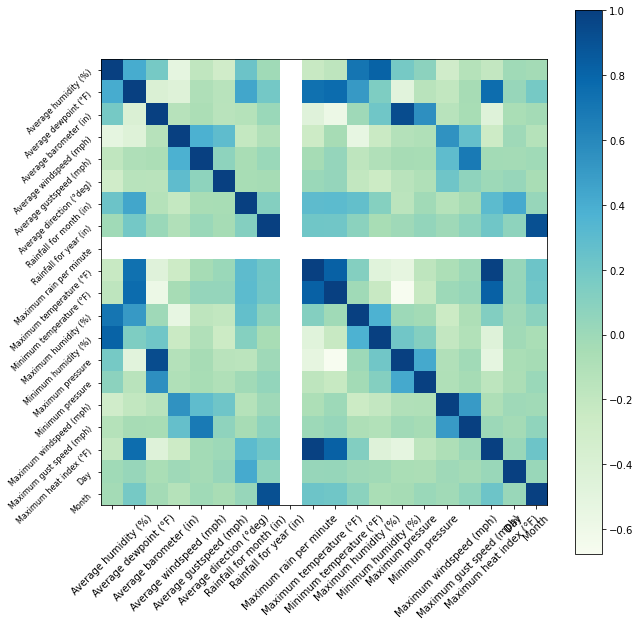

In [11]:
#Checking the correlation between each of the columns
#Vizualizing the correlation between different parameters

fig=plt.figure(figsize=(10,10))
plt.imshow(training_GCDdata.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(training_GCDdata.columns))]
plt.xticks(tick_marks, training_GCDdata.columns, rotation=45)
plt.yticks(tick_marks, training_GCDdata.columns, rotation=45, size=8)

In [12]:
# Column 8: Maximum rain per minute has no effect to temperature, hence removing it. 
training_GCD_relvantdata = training_GCDdata.drop(["Maximum rain per minute"], axis=1)

([<matplotlib.axis.YTick at 0x259cfe4d9a0>,
 [Text(0, 0, 'Average humidity (%)'),
  Text(0, 1, 'Average dewpoint (°F)'),
  Text(0, 2, 'Average barometer (in)'),
  Text(0, 3, 'Average windspeed (mph)'),
  Text(0, 4, 'Average gustspeed (mph)'),
  Text(0, 5, 'Average direction (°deg)'),
  Text(0, 6, 'Rainfall for month (in)'),
  Text(0, 7, 'Rainfall for year (in)'),
  Text(0, 8, 'Maximum temperature (°F)'),
  Text(0, 9, 'Minimum temperature (°F)'),
  Text(0, 10, 'Maximum humidity (%)'),
  Text(0, 11, 'Minimum humidity (%)'),
  Text(0, 12, 'Maximum pressure'),
  Text(0, 13, 'Minimum pressure'),
  Text(0, 14, 'Maximum windspeed (mph)'),
  Text(0, 15, 'Maximum gust speed (mph)'),
  Text(0, 16, 'Maximum heat index (°F)'),
  Text(0, 17, 'Day'),
  Text(0, 18, 'Month')])

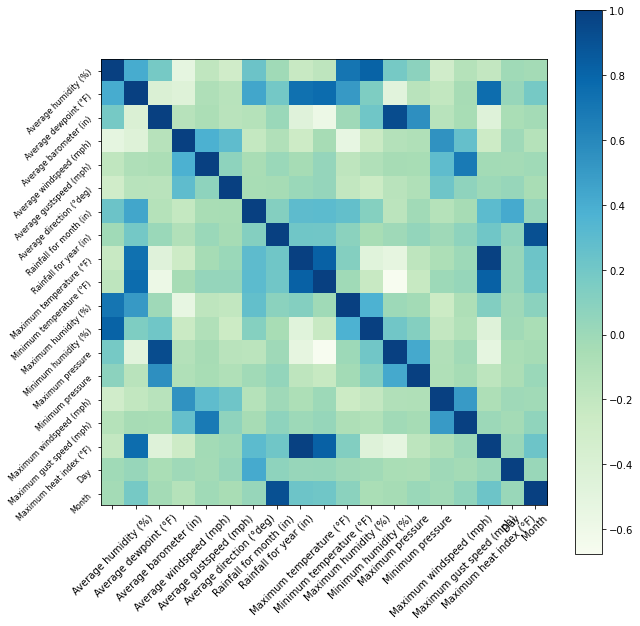

In [13]:
fig=plt.figure(figsize=(10,10))
plt.imshow(training_GCD_relvantdata.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(training_GCD_relvantdata.columns))]
plt.xticks(tick_marks, training_GCD_relvantdata.columns, rotation=45)
plt.yticks(tick_marks, training_GCD_relvantdata.columns, rotation=45, size=8)

### Modelling - Using Linear regression

In [14]:
#We can create our model with our training data by creating a new instance of the LinearRegression class 
#and on that instance call the fit method with two parameters:

#training_GCD_relvantdata is the data frame which would have the multiple varibles as input.
#training_GCDTemplabel is the series (data frame with one column) that has our answers to the inputs-actual Avg. temperature.

In [15]:
lin_reg = LinearRegression()

lin_reg.fit(training_GCD_relvantdata, training_GCDTemplabel)

LinearRegression()

In [16]:
#The lin_reg object can tell us more about the coef_ attribute, and intercept_ attribute

In [17]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [-3.19206456e-01  3.91672667e-01 -2.16993758e+00 -3.08366502e-02
  3.19123382e-03 -5.95145416e-04  2.44375755e-01 -2.63775228e-02
  4.28130540e-01  2.05086222e-01  1.58082936e-02  9.74695099e-02
  7.57012159e-01  2.92913346e-02 -7.38132103e-04  2.50671456e-03
 -1.52315741e-02 -6.87999081e-03  2.38056692e-02]
Intercept:  58.76533641804089


In [18]:
# Equation should look like
#y= -3.2x1 +3.9x2 -2.17x3.......+58.76 

In [19]:
#Let prepare the test dataset to predict based on the model

### Model Evaluation - Using Testing data to against actual data

In [20]:
testing_GCDrelvantdata=testing_GCD.copy()
testing_GCDrelvantdata = testing_GCDrelvantdata.drop(["Average temperature (°F)", "Maximum rain per minute"], axis=1)
print(testing_GCDrelvantdata.shape)
testing_GCDTemplabel = testing_GCD["Average temperature (°F)"]
print(testing_GCDTemplabel)

(1171, 19)
948     23.4
3036    34.2
1960    38.9
3543    63.5
1689    34.1
        ... 
2943    26.4
3413    42.8
3778    29.8
2823    61.1
361     25.9
Name: Average temperature (°F), Length: 1171, dtype: float64


In [21]:
predict_temp = lin_reg.predict(testing_GCDrelvantdata)
print(predict_temp)
print(len(predict_temp))

[22.2849955  35.58593519 40.33299862 ... 27.88552589 59.53063073
 25.38468411]
1171


In [22]:
#Scoring the Model:Provide test set and test labels as parameters.
lin_reg.score(testing_GCDrelvantdata, testing_GCDTemplabel)

0.9921937250578021

In [23]:
#This calculates the coefficient of determination or the r^2 of the model. 
#This can give a score between -1 and 1. 
#Scores closer to -1 giving a negative impact on the model and scores closer to 1 give a positive impact to the model. 
#In our case, we have 0.99 which is close to 1 which indicates that we have a pretty good model.
r2_score(testing_GCDTemplabel, predict_temp)

0.9921937250578021

In [24]:
#Converting actual temperature to list for predict labels to match datatypes
actual_temp=list(testing_GCDTemplabel)
#actual_temp

In [25]:
#Lets run the model against complete dataset to vizualize the model accuracy

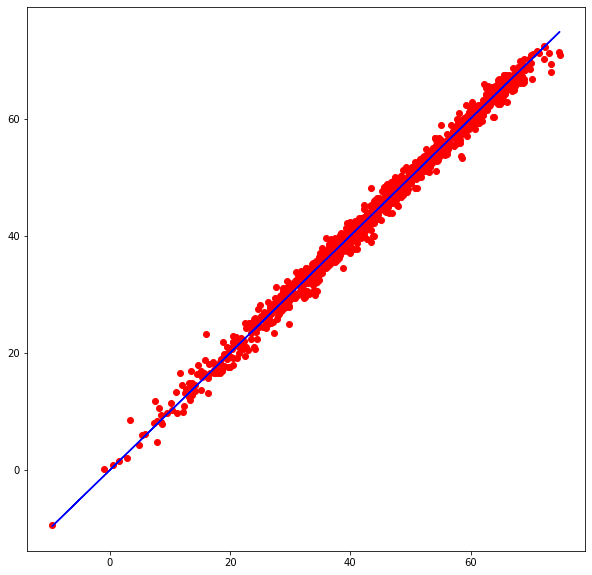

In [26]:
fig=plt.figure(figsize=(10,10))
plt.scatter(testing_GCD['Average temperature (°F)'],predict_temp, color='red')
plt.plot(testing_GCD['Average temperature (°F)'],actual_temp, color='blue')

### Model Evaluation - Using against the entire data

In [27]:
all_numerical_parameters = input_all_columns_GCD.drop(["Average temperature (°F)","Maximum rain per minute"], axis=1)
all_numerical_parameters.head(5)

,Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Day,Month
0,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,40.0,34.0,4.0,27.0,29.762,29.596,41.4,59.0,40.0,1,1
1,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,52.0,37.0,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2,1
2,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,41.0,6.0,8.0,35.0,30.232,29.260,25.3,38.0,41.0,3,1
3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,19.0,-0.0,7.0,35.0,30.566,30.227,12.7,20.0,32.0,4,1
4,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,30.0,15.0,5.0,13.0,30.233,29.568,38.0,53.0,32.0,5,1


In [28]:
predict_temp_Complete = lin_reg.predict(all_numerical_parameters)
print(predict_temp_Complete)
print(len(predict_temp_Complete))

[36.97565283 43.92536884 25.27051889 ... 60.08108956 61.21766882
 61.27116996]
3902


In [29]:
#Vizualizing the all the Actual temperature vs Predicted temperature 

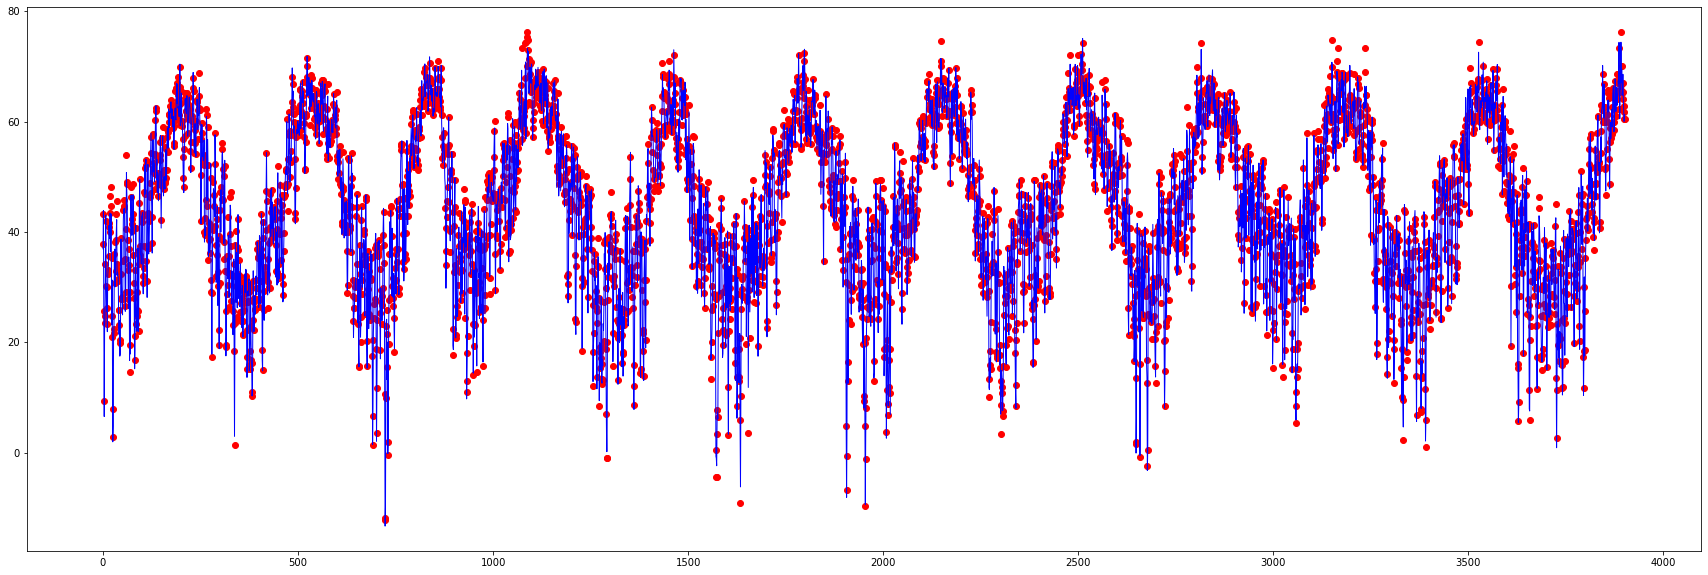

In [52]:
fig = plt.figure(figsize=(30,10))
fig = plt.scatter(all_numerical_parameters.index,input_all_columns_GCD["Average temperature (°F)"], color='red', linewidths=1)
fig = plt.plot(all_numerical_parameters.index, predict_temp_Complete, color='blue', linewidth=1)

### Model Evaluation - Using data gathered by web scrapping

In [31]:
#lets evaluate this model against new data from August 2020 to November 2020

In [32]:
GCD_2020=pd.read_csv('climate_data_Aug_to_Nov.csv')
GCD_2020.head(10)

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
0,2020-08-01,59.3,62.0,44.2,29.9,3.0,4.9,328.0,0.08,4.88,0.0,78.3,40.0,95.0,26.0,30.050,29.890,23.0,34.5,78.2
1,2020-08-02,58.7,71.0,48.4,29.9,1.9,3.4,8.0,0.23,5.03,0.0,74.0,44.0,95.0,37.0,29.910,29.807,11.5,16.1,77.4
2,2020-08-03,61.5,64.0,47.2,29.8,2.3,3.8,12.0,0.31,5.11,0.0,78.4,43.2,95.0,30.0,29.877,29.725,11.5,18.4,78.6
3,2020-08-04,65.8,55.0,44.7,29.7,3.9,6.6,343.0,0.31,5.11,0.0,87.0,50.4,85.0,10.0,29.802,29.649,20.7,32.2,83.5
4,2020-08-05,63.1,59.0,46.2,29.7,1.9,3.3,14.0,0.31,5.11,0.0,78.4,48.4,92.0,22.0,29.752,29.637,19.6,29.9,78.7
5,2020-08-06,62.7,55.0,43.5,29.6,3.5,5.5,282.0,0.34,5.14,0.0,82.9,47.3,88.0,19.0,29.684,29.571,16.1,26.5,80.5
6,2020-08-07,65.1,37.0,26.4,29.7,4.2,6.6,234.0,0.34,5.14,0.0,85.4,39.5,87.0,6.0,29.732,29.652,16.1,26.5,82.3
7,2020-08-08,69.9,16.0,18.5,29.7,4.1,6.8,260.0,0.34,5.14,0.0,84.9,52.4,37.0,5.0,29.729,29.614,13.8,25.3,81.9
8,2020-08-09,66.2,23.0,21.3,29.7,3.3,5.3,233.0,0.34,5.14,0.0,90.4,42.3,50.0,6.0,29.765,29.658,20.7,33.4,86.4
9,2020-08-10,65.0,31.0,31.1,29.7,3.7,5.9,172.0,0.34,5.14,0.0,83.2,45.4,58.0,10.0,29.726,29.642,26.5,35.7,80.5


In [33]:
GCD_2020["Day"] = pd.DatetimeIndex(GCD_2020["Date"]).day
GCD_2020["Month"] = pd.DatetimeIndex(GCD_2020["Date"]).month
GCD_2020.head(5)

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Day,Month
0,2020-08-01,59.3,62.0,44.2,29.9,3.0,4.9,328.0,0.08,4.88,...,40.0,95.0,26.0,30.050,29.890,23.0,34.5,78.2,1,8
1,2020-08-02,58.7,71.0,48.4,29.9,1.9,3.4,8.0,0.23,5.03,...,44.0,95.0,37.0,29.910,29.807,11.5,16.1,77.4,2,8
2,2020-08-03,61.5,64.0,47.2,29.8,2.3,3.8,12.0,0.31,5.11,...,43.2,95.0,30.0,29.877,29.725,11.5,18.4,78.6,3,8
3,2020-08-04,65.8,55.0,44.7,29.7,3.9,6.6,343.0,0.31,5.11,...,50.4,85.0,10.0,29.802,29.649,20.7,32.2,83.5,4,8
4,2020-08-05,63.1,59.0,46.2,29.7,1.9,3.3,14.0,0.31,5.11,...,48.4,92.0,22.0,29.752,29.637,19.6,29.9,78.7,5,8


In [34]:
evaluating_GCD_2020 = GCD_2020.drop(["Date","Average temperature (°F)", "Maximum rain per minute"], axis=1)
print(evaluating_GCD_2020.shape)
evaluating_GCDTemplabel = GCD_2020["Average temperature (°F)"]
print(evaluating_GCDTemplabel)

(120, 19)
0      59.3
1      58.7
2      61.5
3      65.8
4      63.1
       ... 
115    28.3
116    35.1
117    29.4
118    21.4
119    27.6
Name: Average temperature (°F), Length: 120, dtype: float64


In [35]:
lin_reg.score(evaluating_GCD_2020, evaluating_GCDTemplabel)

0.989718020493763

In [36]:
predict_2020 = lin_reg.predict(evaluating_GCD_2020)
print(predict_2020)
print(len(predict_2020))

[59.47184123 58.40709359 61.38316955 66.19479882 62.96370012 64.45643118
 61.49019695 66.62574756 66.07859215 65.51326682 66.11777349 65.24020466
 64.2417961  66.14851682 63.90159317 64.35891168 66.4445964  65.39760501
 64.40417074 63.35820152 65.85217307 64.61173244 65.16729587 69.17977642
 69.54155987 65.51340936 63.87875819 59.42952994 55.30667347 67.24869354
 52.38384804 60.46988401 59.99890491 65.26776788 60.90520951 64.36381929
 68.07541966 60.51284495 28.90879588 26.77473419 33.70434741 46.13796265
 59.81829264 54.26839529 56.49580522 58.68206428 53.68986006 54.61314159
 56.09936118 61.04172471 60.37215004 56.84939316 56.72939992 62.0628952
 62.35254187 63.94232226 64.95963044 45.18038657 42.15928563 57.15741501
 52.13111905 44.28184643 54.71560242 46.11321901 52.32594614 57.33468239
 54.61981103 53.75789662 53.12863885 60.45021099 55.17439103 49.47237604
 50.49863549 58.8073823  53.3457755  34.15256383 46.90922452 51.89086345
 47.91511428 56.55434598 52.90913752 48.94482714 37.

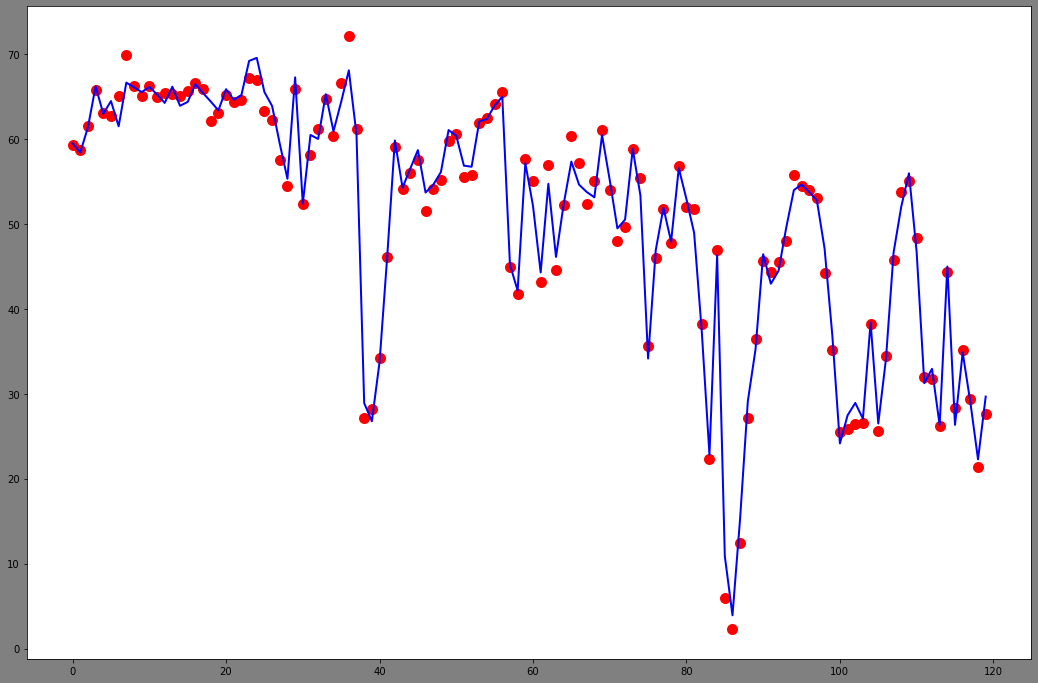

In [37]:
fig=plt.figure(figsize=(18,12),facecolor = 'grey')
plt.scatter(evaluating_GCD_2020.index,evaluating_GCDTemplabel, color='red', linewidths=5, alpha=1)
plt.plot(evaluating_GCD_2020.index,predict_2020, color='blue', linewidth=2)

### Conclusions

Using the model for temperature prediction yields results which are almost equal to the actual temperature.